# Lineare Regression
## Multiple Regression und Dummy Kodierung

### Multiple Regression

In [2]:
import pandas as pd
url = "https://raw.githubusercontent.com/troescherw/datasets/master/autos.csv"
autos = pd.read_csv(url)
autos.head()

,Verbrauch,Leistung,Gewicht
0,11.20,82,1310
1,11.20,82,1437
2,10.32,69,1160
3,10.99,82,1607
4,12.58,130,1720


<AxesSubplot:>

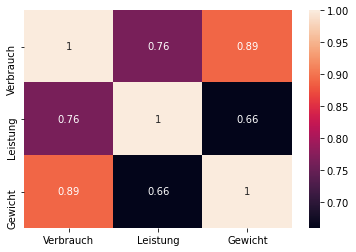

In [5]:
import seaborn as sns
corrs = autos.corr()
sns.heatmap(corrs, annot=True)


In [9]:
import statsmodels.formula.api as sm
model = sm.ols("Verbrauch~Gewicht+Leistung", data=autos).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Verbrauch   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     80.34
Date:                Sun, 04 Apr 2021   Prob (F-statistic):           1.49e-12
Time:                        10:01:54   Log-Likelihood:                -58.092
No. Observations:                  32   AIC:                             122.2
Df Residuals:                      29   BIC:                             126.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4939      0.963      1.552      0.132      -0.475       3.463
Gewicht        0.0054      0.001      7.083      0.000       0.004       0.007
Leistung       0.0236      0.007      3.238      0.003       0.009       0.038
==============================================================================
Omnibus:                        1.431   Durbin-Watson:                   1.790
Prob(Omnibus):                  0.489   Jarque-Bera (JB):                0.515
Skew:                          -0.212   Prob(JB):                        0.773
Kurtosis:                       3.455   Cond. No.                     5.87e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.87e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Dummy Kodierung

In [20]:
url = "https://raw.githubusercontent.com/troescherw/datasets/master/wohnungen.csv"
wohnungen = pd.read_csv(url, delimiter=";")
wohnungen.sample(10)

,Mietpreis,Quadratmeter,Lage
74,1273,67,Aussenbezirk
57,493,29,Umland
84,2900,104,Innenstadt
91,855,45,Umland
96,2958,174,Aussenbezirk
39,1121,59,Aussenbezirk
88,1300,69,Aussenbezirk
25,690,46,Umland
43,3900,158,Innenstadt
94,646,38,Aussenbezirk


Variante 1: Mit Hilfe der Funktion *get_dummies* aus *Pandas*.

In [18]:
wohnungen_dummies = pd.get_dummies(wohnungen, drop_first=True)
wohnungen_dummies

,Mietpreis,Quadratmeter,Lage_Innenstadt,Lage_Umland
0,1100,87,0,1
1,588,42,0,1
2,850,54,0,1
3,500,33,0,1
4,1900,104,0,1
...,...,...,...,...
95,1800,101,0,0
96,2958,174,0,0
97,950,50,0,0
98,2656,166,0,0


In [22]:
model1 = sm.ols("Mietpreis~Quadratmeter+Lage_Innenstadt+Lage_Umland", data=wohnungen_dummies).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Mietpreis   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     527.5
Date:                Sun, 04 Apr 2021   Prob (F-statistic):           1.73e-59
Time:                        10:08:39   Log-Likelihood:                -682.44
No. Observations:                 100   AIC:                             1373.
Df Residuals:                      96   BIC:                             1383.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          34.5884     57.142      0.605      0.546     -78.837     148.014
Quadratmeter       17.4891      0.489     35.755      0.000      16.518      18.460
Lage_Innenstadt   653.1795     52.528     12.435      0.000     548.913     757.446
Lage_Umland      -152.3866     60.274     -2.528      0.013    -272.029     -32.745
==============================================================================
Omnibus:                        0.150   Durbin-Watson:                   1.592
Prob(Omnibus):                  0.928   Jarque-Bera (JB):                0.328
Skew:                          -0.036   Prob(JB):                        0.849
Kurtosis:                       2.729   Cond. No.                         347.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Variante 2: Mit Hilfe von "c" in der Formel:

In [24]:
model2 = sm.ols("Mietpreis~Quadratmeter+C(Lage)", data=wohnungen).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Mietpreis   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     527.5
Date:                Sun, 04 Apr 2021   Prob (F-statistic):           1.73e-59
Time:                        10:10:25   Log-Likelihood:                -682.44
No. Observations:                 100   AIC:                             1373.
Df Residuals:                      96   BIC:                             1383.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                34.5884     57.142      0.605      0.546     -78.837     148.014
C(Lage)[T.Innenstadt]   653.1795     52.528     12.435      0.000     548.913     757.446
C(Lage)[T.Umland]      -152.3866     60.274     -2.528      0.013    -272.029     -32.745
Quadratmeter             17.4891      0.489     35.755      0.000      16.518      18.460
==============================================================================
Omnibus:                        0.150   Durbin-Watson:                   1.592
Prob(Omnibus):                  0.928   Jarque-Bera (JB):                0.328
Skew:                          -0.036   Prob(JB):                        0.849
Kurtosis:                       2.729   Cond. No.                         347.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""